## Tantangan
Ketika kapal Titanic tenggelam pada tanggal 15 April 1912, selama pelayaran perdana, kejadian tersebut menjadi salah satu bencana paling terkenal dalam sejarah.

Meskipun dianggap sebagai kapal yang "mustahil tenggelam", RMS Titanic akhirnya tenggelam setelah bertabrakan dengan gunung es. Sayangnya, jumlah sekoci penyelamat tidak mencukupi untuk semua penumpang dan kru yang berjumlah 2224 orang, sehingga 1502 di antaranya tewas.

Meskipun keberuntungan memainkan peran dalam kelangsungan hidup, tampaknya ada beberapa kelompok orang yang lebih mungkin selamat daripada yang lain.

Dalam tantangan ini, kami mengajak Anda untuk membangun model prediktif yang menjawab pertanyaan: "kelompok orang seperti apa yang lebih mungkin selamat?" menggunakan data penumpang (yaitu nama, usia, jenis kelamin, kelas sosial, dll).

Mari kita jelajahi cerita tragis Titanic ini dengan data yang menarik! 🚢✨

| Variable | Definition              | Key                                               |
|----------|-------------------------|---------------------------------------------------|
| survival | Survival               | 0 = No, 1 = Yes                                   |
| pclass   | Ticket class            | 1 = 1st, 2 = 2nd, 3 = 3rd                         |
| sex      | Sex                     |                                                   |
| Age      | Age in years            |                                                   |
| sibsp    | # of siblings/spouses   |                                                   |
| parch    | # of parents/children   |                                                   |
| ticket   | Ticket number           |                                                   |
| fare     | Passenger fare          |                                                   |
| cabin    | Cabin number            |                                                   |
| embarked | Port of Embarkation     | C = Cherbourg, Q = Queenstown, S = Southampton    |


In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Project Planning 🚀

When embarking on a new project, a thoughtful and well-structured plan is crucial for success. Below is a comprehensive outline for this particular project, complete with comments explaining each step:

### 1. **Understanding the Data** 📊

   - Utilize `.info()` and `.describe()` to comprehend the nature of the dataset.
   - Generate histograms and boxplots to visualize data distributions.
   - Examine value counts for categorical variables to gain insights.

### 2. **Handling Missing Data** 🕵️‍♂️

   - Identify and address missing data to ensure data integrity.
   - Consider appropriate strategies such as imputation or removal.

### 3. **Exploratory Data Analysis (EDA)** 🔍

   - Investigate the correlation between different metrics.
   - Explore intriguing themes within the data:
      - Analyze survival rates based on wealth indicators.
      - Geographical analysis of survival rates by location.
      - Create a scatterplot to explore the relationship between age and ticket price.
      - Investigate the correlation between youth and wealth.
      - Explore the total amount spent by passengers.

### 4. **Feature Engineering** 🛠️

   - Identify and create relevant features that might enhance model performance.

### 5. **Data Preprocessing** 🔄

   - Decide whether to preprocess data collectively or use a transformer.
   - Consider label encoding for train and test data to maintain consistency.

### 6. **Scaling** ⚖️

   - Evaluate the necessity of scaling numerical features and implement if required.

### 7. **Model Baseline** 🏗️

   - Establish a baseline model to measure the initial performance.

### 8. **Model Comparison with Cross-Validation** 🔄📊

   - Explore various models and compare their performance using cross-validation.
   - Fine-tune hyperparameters for better model accuracy and generalization.

This structured approach ensures a systematic exploration of the dataset, meaningful analysis, and iterative improvements to the model. Regular checkpoints can be established to review progress and adjust the plan as needed. Remember, a well-planned project sets the foundation for successful execution and meaningful results. 🌟🚀

### 1. **Understanding the Data** 📊
For numeric data
- Made histograms to understand distributions
- Corrplot
- Pivot table comparing survival rate across numeric variables

For Categorical Data
- Made bar charts to understand balance of classes
- Made pivot tables to understand relationship with survival

In [227]:
df_train = pd.read_csv("./Dataset/train.csv")

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [170]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The provided DataFrame consists of 891 entries, representing passengers on the Titanic. Let's analyze the information conveyed by the DataFrame's structure:

1. **Passenger Demographics:**
   - The dataset includes information on various demographics, such as `Name`, `Sex`, and `Age`.
   - The `Sex` column is categorical, indicating the gender of each passenger.

2. **Ticket and Fare Details:**
   - Details about the ticket class (`Pclass`), ticket number (`Ticket`), and fare paid by each passenger (`Fare`) are available.
   - The `Pclass` column is categorical, representing the ticket class (1st, 2nd, or 3rd).

3. **Family Relations:**
   - Information about family relations is captured through columns like `SibSp` (sibling/spouse count) and `Parch` (parent/child count).

4. **Survival Data:**
   - The target variable, `Survived`, is binary (0 or 1), indicating whether a passenger survived (1) or not (0).

5. **Cabin and Embarkation Details:**
   - The `Cabin` column has a significant number of missing values (687 out of 891), indicating that cabin information is incomplete.
   - `Embarked` represents the port of embarkation, with two missing values.

6. **Data Types:**
   - The data types are appropriately assigned, with integers (`int64`), floating-point numbers (`float64`), and object (string) types.

7. **Data Completeness:**
   - The `Age` column has missing values for some passengers (177 out of 891), suggesting incomplete age data.
   - Similarly, the `Embarked` column has two missing values.

8. **Memory Usage:**
   - The memory usage of the DataFrame is 83.7 KB, indicating a relatively small dataset.

This initial analysis provides an overview of the dataset's structure, highlighting potential areas for data cleaning and exploration, such as handling missing values in `Age`, `Cabin`, and `Embarked`. Further exploration and preprocessing are needed to derive meaningful insights and build predictive models.

In [171]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Data statistik ini memberikan wawasan yang mendalam tentang karakteristik utama dari dataset penumpang Titanic. Dengan melihat kolom umur (Age), dapat dilihat bahwa rata-rata umur penumpang adalah sekitar 29.7 tahun, dengan variasi yang signifikan (standar deviasi sekitar 14.5 tahun). Distribusi umur penumpang cenderung merata, dengan nilai minimum 0.42 tahun dan maksimum 80 tahun. Pada kolom kelas tiket (Pclass), mayoritas penumpang berada di kelas 2 atau 3, menunjukkan komposisi kelas yang cukup heterogen. Untuk kolom tarif (Fare), distribusinya sangat bervariasi, dengan rata-rata sekitar 32.20 dan nilai maksimum yang mencapai 512.33, menunjukkan adanya penumpang dengan tarif yang sangat tinggi. Analisis tingkat kelangsungan hidup (Survived) menunjukkan bahwa sekitar 38.4% dari total penumpang selamat. Data ini memberikan pemahaman yang lebih mendalam tentang distribusi dan variasi dalam dataset, yang dapat membimbing analisis lebih lanjut terkait faktor-faktor yang mempengaruhi kelangsungan hidup penumpang Titanic.

In [172]:
num_feature = df_train[['Age','SibSp','Parch','Fare','Survived']]
cat_feature = df_train[['Pclass','Sex','Ticket','Cabin','Embarked','Survived']]

In [173]:
cat_feature.value_counts()

Pclass  Sex     Ticket             Cabin            Embarked  Survived
1       female  110152             B77              S         1           2
3       female  347054             G6               S         0           2
1       female  PC 17608           B57 B59 B63 B66  C         1           2
                PC 17477           B35              C         1           2
                36947              D20              C         1           2
                                                                         ..
        male    110465             C110             S         0           1
                110564             C52              S         1           1
                111240             B19              S         0           1
                111320             E63              S         0           1
3       male    SOTON/O.Q. 392078  E10              S         1           1
Name: count, Length: 184, dtype: int64

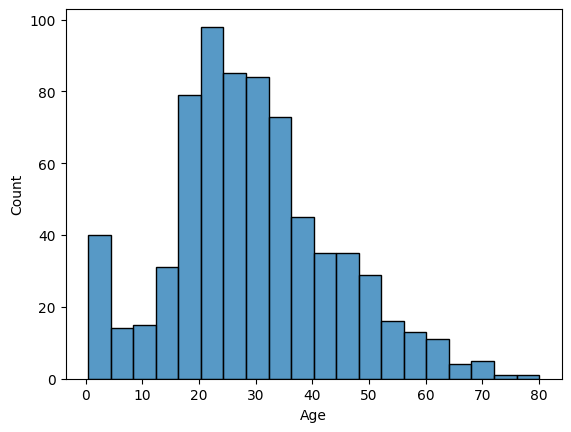

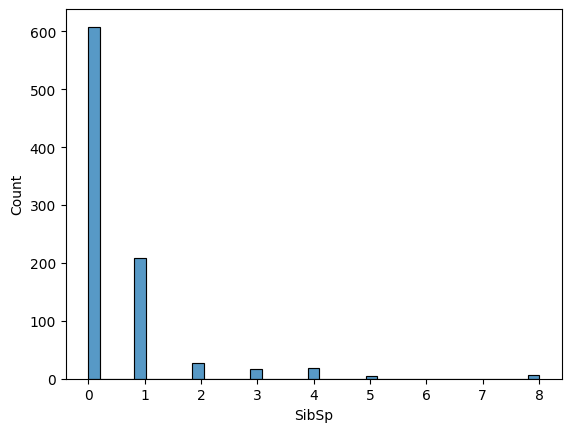

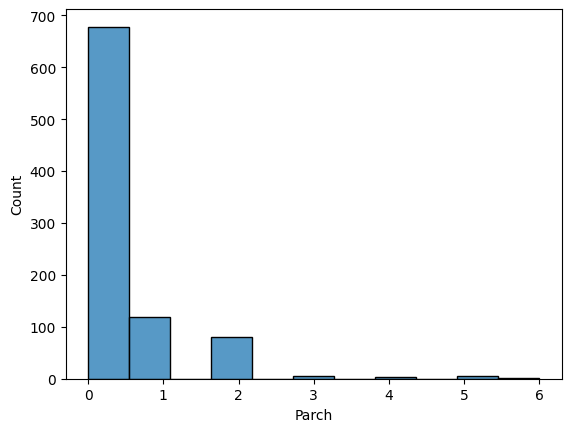

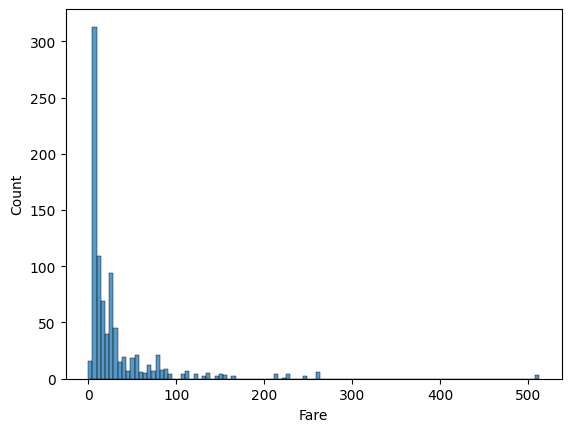

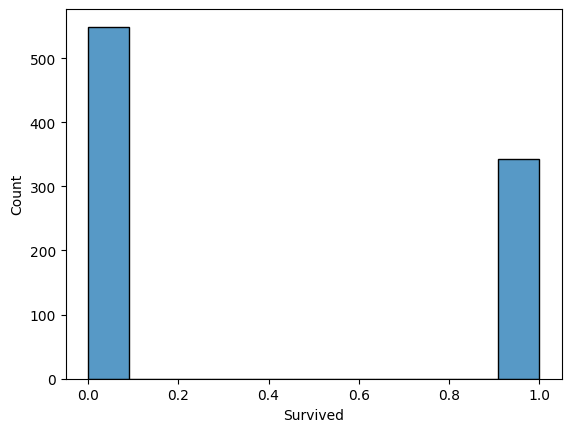

In [174]:
for i in num_feature:
    sns.histplot(data=num_feature, x=num_feature[i])
    plt.show()

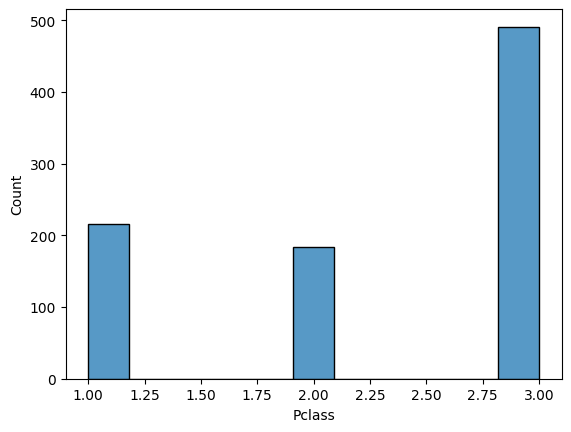

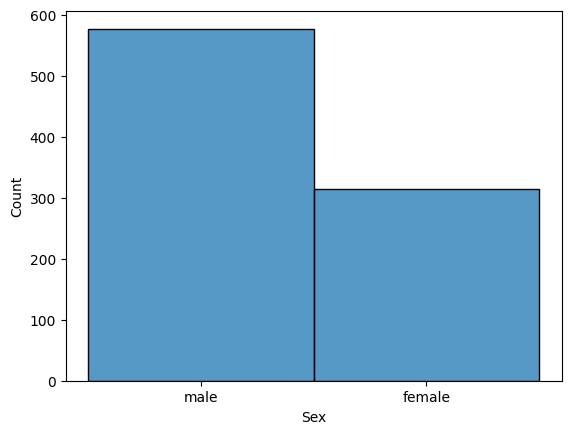

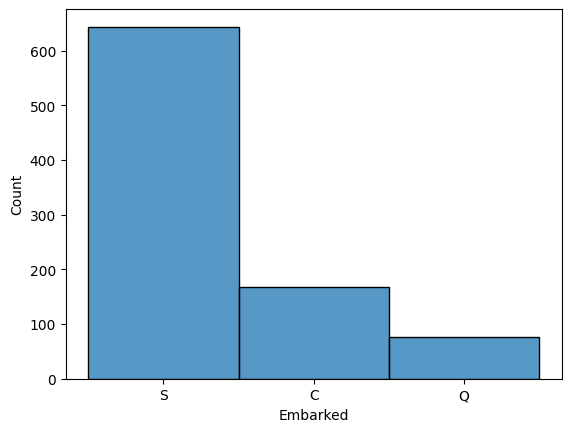

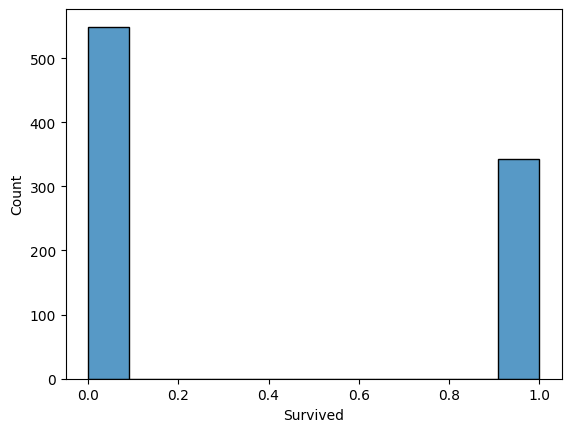

In [175]:
for i in cat_feature:
    if i == 'Cabin' or i == 'Ticket':
        continue
    sns.histplot(data=cat_feature, x=cat_feature[i])
    plt.show()

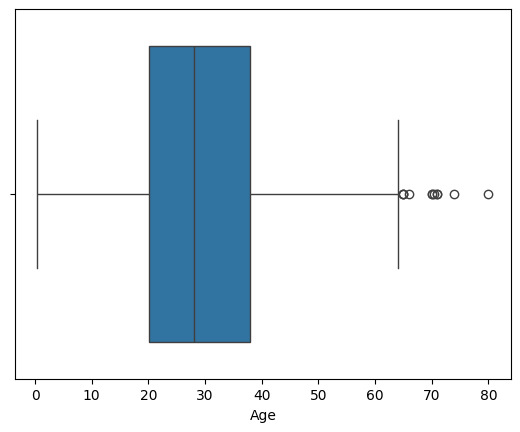

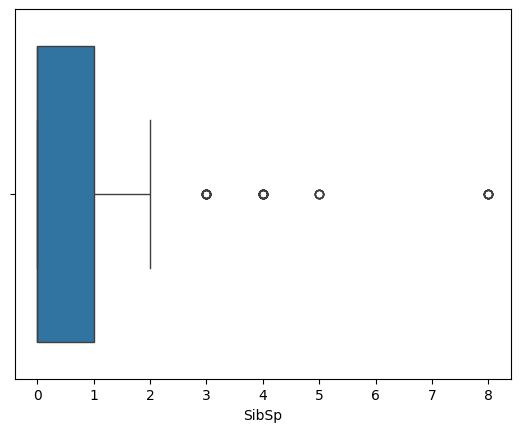

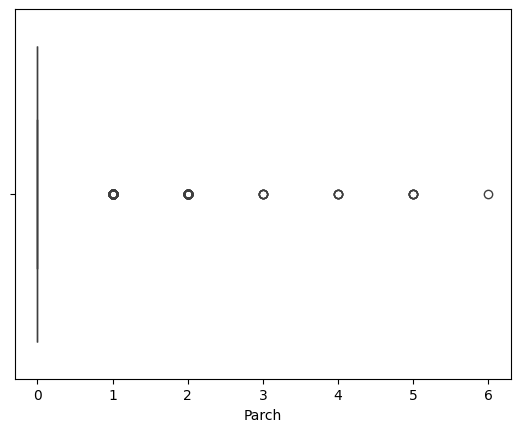

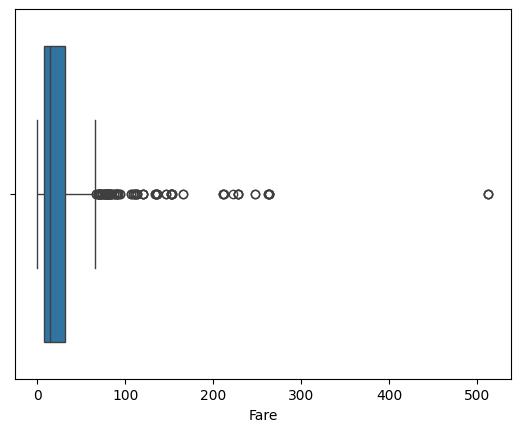

In [176]:
for i in num_feature:
    if i == 'Survived':
        continue
    sns.boxplot(x=df_train[i])
    plt.show()

<Axes: >

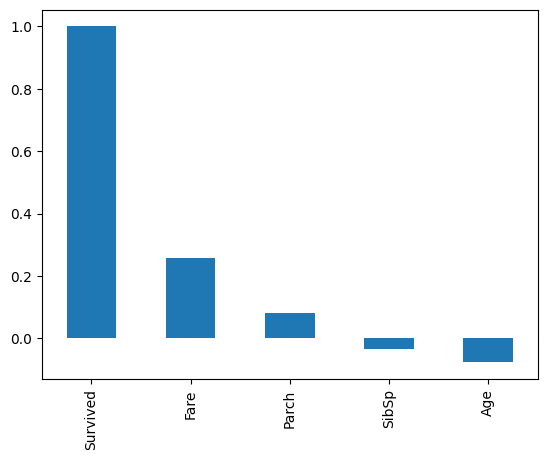

In [177]:
num_feature.corr()['Survived'].sort_values(ascending=False).plot(kind='bar')

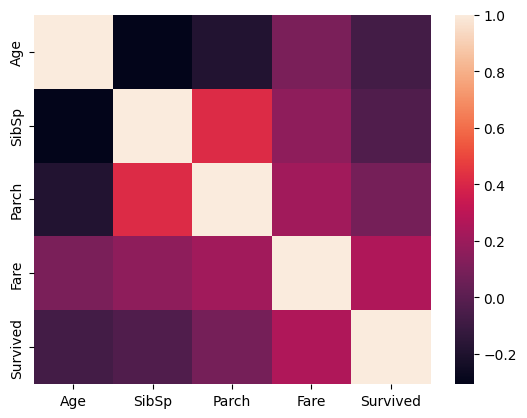

In [178]:
sns.heatmap(data=num_feature.corr())
plt.show()

In [179]:
# compare survival rate across Age, SibSp, Parch, and Fare 
pd.pivot_table(df_train, index = 'Survived', values = ['Age','SibSp','Parch','Fare'],aggfunc='mean')

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


Pivot tabel di atas memberikan ringkasan statistik untuk beberapa variabel numerik berdasarkan kategori Survived (Selamat atau Tidak Selamat). Berikut adalah analisis dari tabel tersebut:

1. **Age (Usia):**
   - Rata-rata usia penumpang yang tidak selamat (Survived=0) adalah sekitar 30.63 tahun, sedangkan rata-rata usia penumpang yang selamat (Survived=1) sedikit lebih rendah, yaitu sekitar 28.34 tahun.
   - Meskipun ada perbedaan, perbedaan ini tidak terlalu besar, sehingga kesimpulan langsung tentang pengaruh usia terhadap kelangsungan hidup tidak dapat diambil hanya dari rata-rata ini.

2. **Fare (Tarif):**
   - Rata-rata tarif yang dibayarkan oleh penumpang yang selamat (Survived=1) jauh lebih tinggi (sekitar 48.40) daripada penumpang yang tidak selamat (Survived=0) dengan rata-rata tarif sekitar 22.12.
   - Hal ini mungkin menunjukkan bahwa penumpang dengan tarif lebih tinggi memiliki kemungkinan selamat yang lebih besar.

3. **Parch (Jumlah Orang Tua atau Anak):**
   - Rata-rata jumlah orang tua atau anak-anak (Parch) tampaknya sedikit lebih tinggi untuk penumpang yang selamat (Survived=1) dibandingkan dengan yang tidak selamat (Survived=0).
   - Namun, perbedaan ini tidak signifikan secara dramatis.

4. **SibSp (Jumlah Saudara atau Pasangan):**
   - Rata-rata jumlah saudara atau pasangan (SibSp) mirip di antara penumpang yang selamat dan tidak selamat, dengan perbedaan yang relatif kecil.
   - Variabel ini sendiri mungkin tidak memberikan indikasi yang jelas tentang kelangsungan hidup.

Analisis ini memberikan pemahaman awal tentang perbedaan statistik antara penumpang yang selamat dan tidak selamat, tetapi perlu diingat bahwa interpretasi lebih lanjut dan analisis statistik yang lebih mendalam mungkin diperlukan untuk mengonfirmasi temuan ini.

In [180]:
# Comparing survival and each of these categorical variables 
pd.pivot_table(df_train, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


### Analisis Tabel Pivoting (Pclass vs. Survived)

Tabel ini memberikan informasi tentang jumlah penumpang yang selamat dan tidak selamat berdasarkan kelas tiket (Pclass).

- **Kelas Tiket 1:**
  - Tidak Selamat (Survived=0): 80 penumpang
  - Selamat (Survived=1): 136 penumpang

- **Kelas Tiket 2:**
  - Tidak Selamat (Survived=0): 97 penumpang
  - Selamat (Survived=1): 87 penumpang

- **Kelas Tiket 3:**
  - Tidak Selamat (Survived=0): 372 penumpang
  - Selamat (Survived=1): 119 penumpang

#### Analisis:

1. **Kelas Tiket 1:**
   - Jumlah penumpang yang selamat lebih tinggi daripada yang tidak selamat.
   - Menunjukkan bahwa penumpang kelas 1 memiliki tingkat kelangsungan hidup yang lebih tinggi.

2. **Kelas Tiket 2:**
   - Jumlah penumpang yang tidak selamat hampir sama dengan yang selamat.
   - Menunjukkan bahwa penumpang kelas 2 memiliki tingkat kelangsungan hidup yang cukup seimbang.

3. **Kelas Tiket 3:**
   - Jumlah penumpang yang tidak selamat jauh lebih tinggi daripada yang selamat.
   - Menunjukkan bahwa penumpang kelas 3 memiliki tingkat kelangsungan hidup yang lebih rendah.

**Kesimpulan:**
- Kelas tiket berkontribusi signifikan terhadap kelangsungan hidup.
- Penumpang dengan kelas tiket lebih tinggi (1 dan 2) memiliki tingkat kelangsungan hidup yang lebih baik daripada yang berada di kelas 3.
- Faktor kelas tiket dapat menjadi indikator penting dalam memahami pola kelangsungan hidup di kapal Titanic.

In [181]:
pd.pivot_table(df_train, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count')

Sex,female,male
Survived,,
0,81,468
1,233,109


### Analisis Tabel Pivoting (Sex vs. Survived)

Tabel ini memberikan informasi tentang jumlah penumpang yang selamat dan tidak selamat berdasarkan jenis kelamin.

- **Perempuan (female):**
  - Tidak Selamat (Survived=0): 81 penumpang
  - Selamat (Survived=1): 233 penumpang

- **Laki-laki (male):**
  - Tidak Selamat (Survived=0): 468 penumpang
  - Selamat (Survived=1): 109 penumpang

#### Analisis:

1. **Perempuan (female):**
   - Jumlah penumpang perempuan yang selamat jauh lebih tinggi dibandingkan dengan yang tidak selamat.
   - Menunjukkan bahwa perempuan memiliki tingkat kelangsungan hidup yang lebih tinggi.

2. **Laki-laki (male):**
   - Jumlah penumpang laki-laki yang tidak selamat jauh lebih tinggi daripada yang selamat.
   - Menunjukkan bahwa laki-laki memiliki tingkat kelangsungan hidup yang lebih rendah.

**Kesimpulan:**
- Jenis kelamin merupakan faktor kritis dalam penentuan kelangsungan hidup.
- Wanita memiliki tingkat kelangsungan hidup yang jauh lebih tinggi dibandingkan dengan pria.
- Data ini mencerminkan kebijakan evakuasi yang memberikan prioritas kepada wanita dan anak-anak selama kejadian bencana seperti tenggelamnya Titanic.

In [182]:
pd.pivot_table(df_train, index = 'Survived', columns = ['Embarked','Pclass'], values = 'Ticket' ,aggfunc ='count')

Embarked   C         Q          S         
Pclass     1  2   3  1  2   3   1   2    3
Survived                                  
0         26  8  41  1  1  45  53  88  286
1         59  9  25  1  2  27  74  76   67

Kesimpulan:
- Cherbourg (C):

    Mayoritas penumpang dari Cherbourg yang selamat berasal dari kelas tiket 1.
    Jumlah penumpang selamat dari Cherbourg lebih tinggi dibandingkan dengan yang tidak selamat.

- Queenstown (Q):

    Mayoritas penumpang dari Queenstown yang selamat berasal dari kelas tiket 3.
    Terdapat perbedaan yang signifikan antara jumlah penumpang yang selamat dan tidak selamat dari Queenstown.

- Southampton (S):

    Mayoritas penumpang dari Southampton yang selamat berasal dari kelas tiket 1 dan 2.
    Penumpang kelas 3 dari Southampton memiliki tingkat kelangsungan hidup yang relatif rendah.
    Analisis ini memberikan wawasan lebih lanjut tentang hubungan antara tempat naik ke kapal, kelas tiket, dan kelangsungan hidup. Kombinasi faktor ini dapat memberikan konteks lebih dalam tentang strategi evakuasi dan faktor penentu selama bencana kapal Titanic tenggelam.

### 4. **Feature Engineering** 🛠️
1) Cabin - Simplify cabins (evaluated if cabin letter (cabin_adv) or the purchase of tickets across multiple cabins (cabin_multiple) impacted survival)
2) Tickets - Do different ticket types impact survival rates?
3) Does a person's title relate to survival rates?


In [183]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [228]:
df_train['Ticket_Latter'] = df_train['Ticket'].apply(lambda x : '0' if x.isnumeric() else x.split(' ')[0])

In [229]:
df_train['Ticket_Latter'].value_counts()

Ticket_Latter
0             661
PC             60
C.A.           27
STON/O         12
A/5            10
W./C.           9
CA.             8
SOTON/O.Q.      8
A/5.            7
SOTON/OQ        7
STON/O2.        6
CA              6
F.C.C.          5
C               5
SC/PARIS        5
S.O.C.          5
SC/Paris        4
LINE            4
A/4             3
PP              3
A/4.            3
S.O./P.P.       3
SC/AH           3
A.5.            2
A./5.           2
P/PP            2
WE/P            2
SOTON/O2        2
S.C./PARIS      2
S.W./PP         1
F.C.            1
A/S             1
SO/C            1
W/C             1
SC              1
SCO/W           1
SW/PP           1
Fa              1
S.O.P.          1
S.C./A.4.       1
A4.             1
S.P.            1
W.E.P.          1
C.A./SOTON      1
Name: count, dtype: int64

In [230]:
pd.pivot_table(data=df_train,index=['Survived'],columns=['Ticket_Latter'],values=['Ticket'],aggfunc='count')

Ticket                                                ...  \
Ticket_Latter      0 A./5. A.5.  A/4 A/4.  A/5 A/5.  A/S  A4.    C  ...   
Survived                                                            ...   
0              407.0   2.0  2.0  3.0  3.0  9.0  6.0  1.0  1.0  3.0  ...   
1              254.0   NaN  NaN  NaN  NaN  1.0  1.0  NaN  NaN  2.0  ...   

                                                                               \
Ticket_Latter SOTON/O.Q. SOTON/O2 SOTON/OQ STON/O STON/O2. SW/PP W./C. W.E.P.   
Survived                                                                        
0                    7.0      2.0      6.0    7.0      3.0   NaN   8.0    1.0   
1                    1.0      NaN      1.0    5.0      3.0   1.0   1.0    NaN   

                         
Ticket_Latter  W/C WE/P  
Survived                 
0              1.0  1.0  
1              NaN  1.0  

[2 rows x 44 columns]

In [231]:
#feature engineering on person's title 
df_train['name_title'] = df_train.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [232]:
pd.pivot_table(data=df_train,index=['Survived'], columns=['name_title'],values=['Ticket'], aggfunc='count')

Ticket                                                             \
name_title   Capt  Col  Don   Dr Jonkheer Lady Major Master   Miss Mlle  Mme   
Survived                                                                       
0             1.0  1.0  1.0  4.0      1.0  NaN   1.0   17.0   55.0  NaN  NaN   
1             NaN  1.0  NaN  3.0      NaN  1.0   1.0   23.0  127.0  2.0  1.0   

                                                     
name_title     Mr   Mrs   Ms  Rev  Sir the Countess  
Survived                                             
0           436.0  26.0  NaN  6.0  NaN          NaN  
1            81.0  99.0  1.0  NaN  1.0          1.0

### 5. **Data Preprocessing** 🔄

In [233]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_Latter,name_title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,A/5,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,PC,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,STON/O2.,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr


In [234]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   Age            714 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Fare           891 non-null    float64
 10  Cabin          204 non-null    object 
 11  Embarked       889 non-null    object 
 12  Ticket_Latter  891 non-null    object 
 13  name_title     891 non-null    object 
dtypes: float64(2), int64(5), object(7)
memory usage: 97.6+ KB


In [235]:
df_train.drop(columns=['Cabin'],axis=1,inplace=True) # Drop cabin karena null > 70%
df_train.dropna(subset=['Embarked'],inplace=True)

In [236]:
df_train['Age'].fillna(df_train['Age'].mean(),inplace=True)

In [237]:
# converted fare to category for pd.get_dummies()
df_train['Pclass'] = df_train['Pclass'].astype(str)

<Axes: >

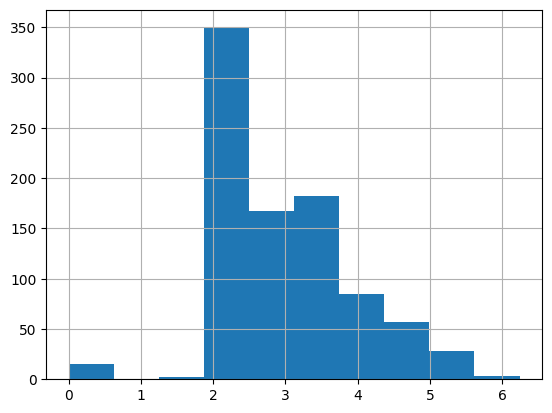

In [238]:
# log norm of fare (used)
df_train['norm_fare'] = np.log(df_train.Fare+1)
df_train['norm_fare'].hist()

In [242]:
#created dummy variables from categories (also can use OneHotEncoder)
all_dummies = pd.get_dummies(df_train[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked']])

In [243]:
from sklearn.model_selection import train_test_split

In [245]:
X = all_dummies
y = df_train['Survived']

# Memisahkan data menjadi set pelatihan (80%) dan set pengujian (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran set pelatihan dan set pengujian
print("Ukuran Set Pelatihan:", X_train.shape, y_train.shape)
print("Ukuran Set Pengujian:", X_test.shape, y_test.shape)
display(X_train,y_train)

Ukuran Set Pelatihan: (711, 12) (711,)
Ukuran Set Pengujian: (178, 12) (178,)


,Age,SibSp,Parch,norm_fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
708,22.000000,0,0,5.027492,True,False,False,True,False,False,False,True
240,29.642093,1,0,2.737881,False,False,True,True,False,True,False,False
382,32.000000,0,0,2.188856,False,False,True,False,True,False,False,True
792,29.642093,8,2,4.256322,False,False,True,True,False,False,False,True
683,14.000000,5,2,3.869116,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
107,29.642093,0,0,2.171907,False,False,True,False,True,False,False,True
271,25.000000,0,0,0.000000,False,False,True,False,True,False,False,True
862,48.000000,0,0,3.293211,True,False,False,True,False,False,False,True
436,21.000000,2,2,3.566005,False,False,True,True,False,False,False,True


708    1
240    0
382    0
792    0
683    0
      ..
107    1
271    1
862    1
436    0
103    0
Name: Survived, Length: 711, dtype: int64

## 6. **Scaling** ⚖️

In [246]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### 7. **Model Baseline** 🏗️

1. Logistic Regression

In [247]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [248]:
# Membuat model regresi logistik
model = LogisticRegression(random_state=42)

In [249]:
# Melatih model menggunakan set pelatihan
model.fit(X_train, y_train)

# Memprediksi nilai target untuk set pengujian
y_pred = model.predict(X_test)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.80


In [202]:
from sklearn.svm import SVC

In [203]:
# Create and train the Support Vector Classifier
svc_model = SVC(kernel='linear', C=1.0, random_state=42)
svc_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svc_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_output)

Accuracy: 0.7865168539325843
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       109
           1       0.72      0.74      0.73        69

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178



In [204]:
from sklearn.ensemble import RandomForestClassifier

In [205]:
# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_output)

Accuracy: 0.7640449438202247
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       109
           1       0.70      0.68      0.69        69

    accuracy                           0.76       178
   macro avg       0.75      0.75      0.75       178
weighted avg       0.76      0.76      0.76       178



### DATA PREDICT

In [250]:
df_test = pd.read_csv('./Dataset/test.csv')

In [251]:
df_test['Ticket_Latter'] = df_test['Ticket'].apply(lambda x : '0' if x.isnumeric() else x.split(' ')[0])

Perbedaan kolom antara df_train dan df_test: ['Survived', 'name_title', 'norm_fare']


In [254]:
df_test.drop(columns=['Cabin'],axis=1,inplace=True) # Drop cabin karena null > 70%
df_test.dropna(subset=['Embarked'],inplace=True)

# fill value age with mean age
df_test['Age'].fillna(df_test['Age'].mean(),inplace=True)

# converted fare to category for pd.get_dummies()
df_test['Pclass'] = df_test['Pclass'].astype(str)

# log norm of fare (used)
df_test['norm_fare'] = np.log(df_test.Fare+1)

#created dummy variables from categories (also can use OneHotEncoder)
all_dummies2 = pd.get_dummies(df_test[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked']])

all_dummies2.ffill(inplace=True)

In [257]:
all_dummies2 = scaler.fit_transform(all_dummies2)

In [259]:
all_dummies2

array([[0.4527232 , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.61756561, 0.125     , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.8153765 , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.50547277, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.39697468, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.39697468, 0.125     , 0.11111111, ..., 1.        , 0.        ,
        0.        ]])

In [260]:
y_pred_test = model.predict(all_dummies2)

In [261]:
y_pred_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [262]:
submission = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': y_pred_test
})

submission.to_csv('submission.csv', index=False)